<a href="https://colab.research.google.com/github/HugoMagos0725/Analisis_de_datos/blob/main/Tarea_2_Inferencia_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FCFM-BUAP, 2023**

## Proyecto: Inferencia Estadistica
Nombre: Hugo Cuautle Magos

Matricula: 201847053

Materia: Análisis de datos

# Problema 1:

Los siguientes datos


In [1]:
import numpy as np

x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

#**Solución**

Veamos que la función stats.cosine, considera la función de densidad como: 
$$f(x)=C\frac{1}{2\pi}(1+\cos(\frac{x-B}{a}))$$
Esto se puede ver en https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html

Por lo que consideremos la función de esta forma, y estimemos los parametros, esto podemos regresarlo a la función planteada en el problema mediante el cambio de variable $B=ba$

Primero veamos que el dominio de la función es $$-\pi < (x-B)/a <\pi $$
    
de esta forma: $$B-a\pi < x < B+a\pi$$

Ahora veamos que $f(x)$ se trata de una función de densidad de probabilidad, así, se tiene que cumplir que 

$$\int_{B-a\pi}^{ B+a\pi}f(x)dx=1$$

Por lo que:

\begin{equation}
  \begin{split}
    1 & = \int_{B-a\pi}^{ B+a\pi}f(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}C\frac{1}{2\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = Ca 
  \end{split}
\end{equation}

De esta forma $C= \frac{1}{a}$

Así, nos queda la función de probabilidad :

$$f(x)=\frac{1}{2a\pi}(1+\cos(\frac{x-B}{a}))$$

Calculemos su esperanza: 

\begin{equation}
  \begin{split}
    E[X] & = \int_{B-a\pi}^{ B+a\pi}xf(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}\frac{x}{2a\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = B
  \end{split}
\end{equation}

Ahora calculemos su segundo momento y seguido de esto su varianza: 

\begin{equation}
  \begin{split}
    E[X^2] & = \int_{B-a\pi}^{ B+a\pi}x^2f(x)dx\\
    & = \int_{B-a\pi}^{B+a\pi}\frac{x^2}{2a\pi}(1+cos(\frac{x-B}{a}))dx \\
    & = \frac{(\pi^2-6)a^2+3B^2}{3}
  \end{split}
\end{equation}

\begin{equation}
  \begin{split}
    Var[X^2] & = E[X^2]-E[X]^2 \\
    & = \frac{(\pi^2-6)a^2+3B^2}{3} - B^2 \\
    & = \frac{(\pi^2-6)a^2}{3}
  \end{split}
\end{equation}

Estimando la media y la varianza con el promedio y la varianza insesgada, tenemos: 

\begin{cases}
  B = E[X]= \overline{X} \\
  \frac{(\pi^2-6)a^2}{3} = Var[X]=s^2
\end{cases}

así, podemos estimar los valores de a y B, como sigue: 


\begin{cases}
  B = \overline{X} \\
  a = \sqrt{\frac{3s^2}{\pi^2-6}}
\end{cases}

entonces: 

In [2]:
B = x.mean()
a =np.sqrt((3*x.var())/(np.pi*np.pi-6))

print('a=', a)
print('B=',B)

a= 1.4967780099710417
B= 2.1342042433999997


Por lo que tenemos que: 

$$a = 1.496778 \text{ y } B=2.1342$$

Comparemos la función de acumulación de una distribucion coseno (con los parametros encontrados a y B), con la acumulación de nuestros datos 

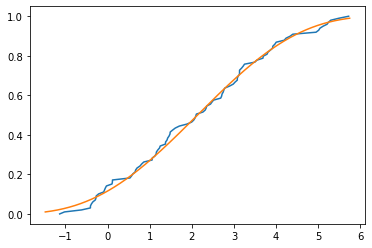

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

x_ord=np.sort(x)
acumulada= np.linspace(0,1,len(x))

x_1 = np.linspace(stats.cosine(B,a).ppf(0.01),
                  stats.cosine(B,a).ppf(0.99), 10000)
fda_cosine=stats.cosine.cdf(x_1, loc=B, scale=a)

plt.plot(x_ord,acumulada)
plt.plot(x_1,fda_cosine)
plt.show()

Vemos que las gráficas son muy parecidas. 

Ahora, encontremos sus intervalos de confianza del 95 % de cada uno. 

Sabemos que el intervalo de confianza de la media y la varianza son 
$$(\overline{X}-z_{\alpha/2}\frac{s}{\sqrt{n}},\overline{X}+z_{\alpha/
2}\frac{s}{\sqrt{n}}) \text{ y } (\frac{(n-1)s^2}{\chi^2_{a/2}},\frac{(n-1)s^2}{\chi^2_{1-a/2}})$$

respectivamente. 

Como $\mu=B$ y $\sigma^2=\frac{(\pi^2-6)a^2}{3}$, podemos tomar los intervalos de confianza de $a$ y $B$ como 

$$(\overline{X}-z_{\alpha/2}\frac{s}{\sqrt{n}},\overline{X}+z_{\alpha/
2}\frac{s}{\sqrt{n}}) \text{ y } (\sqrt{\frac{3(n-1)s^2}{(\pi^2-6)\chi^2_{a/2}}},\sqrt{\frac{3(n-1)s^2}{(\pi^2-6)\chi^2_{1-a/2}}})$$

respectivamente, así, tenemos:

In [4]:
z=stats.norm.ppf(1-0.025)

med_inf=x.mean()-z*np.sqrt(x.var()/len(x))
med_sup=x.mean()+z*np.sqrt(x.var()/len(x))

chi=stats.chi2.ppf(1-0.025,len(x)-1)
var_inf=np.sqrt(3*(len(x)-1)*x.var()/((np.pi*np.pi-6)*chi))

chi=stats.chi2.ppf(0.025,len(x)-1)
var_sup=np.sqrt(3*(len(x)-1)*x.var()/((np.pi*np.pi-6)*chi))

print("El intervalo de confianza de B del 95% es:")
print('(',med_inf,med_sup,')\n')

print("El intervalo de confianza de a del 95% es:")
print('(',var_inf,var_sup,')')

El intervalo de confianza de B del 95% es:
( 1.801024843303938 2.467383643496061 )

El intervalo de confianza de a del 95% es:
( 1.3141813388045576 1.7387699768524847 )


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

# **Solución**

# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv